In [2]:
import csv

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from pandas.api.types import CategoricalDtype
import numpy as np 
import pickle


import matplotlib.pyplot as plt 
import seaborn as sns

In [66]:
df = pd.read_csv('output.csv')


In [68]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,2022-05-01 00:01:28,2022-05-01 00:27:47,N,1.0,181,107,1.0,8.10,25.5,3.25,0.5,8.85,0.0,NaN,0.3,38.40,1.0,1.0,2.75
1,2,2022-05-01 00:54:45,2022-05-01 01:22:01,N,1.0,119,168,2.0,16.99,47.5,0.50,0.5,0.00,0.0,NaN,0.3,48.80,2.0,1.0,0.00
2,2,2022-05-01 00:11:22,2022-05-01 00:11:56,N,5.0,255,255,3.0,0.16,60.0,0.00,0.0,10.00,0.0,NaN,0.3,70.30,1.0,2.0,0.00
3,2,2022-05-01 00:21:09,2022-05-01 00:48:41,N,1.0,223,50,1.0,5.66,22.0,0.50,0.5,5.21,0.0,NaN,0.3,31.26,1.0,1.0,2.75
4,2,2022-04-30 23:21:10,2022-04-30 23:38:37,N,1.0,75,153,1.0,7.52,22.5,0.50,0.5,0.00,0.0,NaN,0.3,23.80,1.0,1.0,0.00


In [70]:
df.shape

(76891, 20)

In [69]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,76891.000000,66433.000000,76891.000000,76891.000000,66433.000000,76891.000000,76891.000000,76891.000000,76891.000000,76891.000000,76891.000000,0.0,76891.000000,76891.000000,66433.000000,66430.000000,66433.000000
mean,1.860543,1.218235,100.478079,138.448830,1.279635,118.614916,15.537695,0.336499,0.407929,2.126048,0.283878,NaN,0.297402,19.664402,1.369184,1.045702,0.739211
std,0.346425,1.104788,64.494962,76.519444,0.903108,3899.610103,13.537154,0.643090,0.196376,3.431635,1.477606,NaN,0.034079,15.803459,0.498030,0.208840,1.219352
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-60.000000,-4.500000,-0.500000,-2.080000,0.000000,NaN,-0.300000,-60.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,65.000000,74.000000,1.000000,1.190000,8.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,10.300000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,2.110000,11.500000,0.000000,0.500000,1.550000,0.000000,NaN,0.300000,15.300000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,134.000000,217.000000,1.000000,3.950000,18.920000,0.500000,0.500000,3.030000,0.000000,NaN,0.300000,23.730000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,360068.140000,595.500000,4.500000,0.500000,333.330000,57.700000,NaN,0.300000,596.300000,4.000000,2.000000,2.750000


In [71]:
df.dtypes


VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

In [72]:
number_of_records = len(df)
print("Number of records in the DataFrame:", number_of_records)

Number of records in the DataFrame: 76891


In [73]:
len(df[df['total_amount'] <= 0])


317

In [74]:
df = df[df['total_amount'] > 0]


In [75]:
number_of_records = len(df)
print("Number of records in the DataFrame:", number_of_records)

Number of records in the DataFrame: 76574


In [76]:
len(df[df['fare_amount'] <= 0])


18

In [77]:
len(df[df['trip_distance'] <= 0])

4336

In [15]:
df = df[(df['fare_amount'] > 0) & (df['trip_distance'] >= 0)]


In [16]:
len(df)

76556

In [78]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,2022-05-01 00:01:28,2022-05-01 00:27:47,N,1.0,181,107,1.0,8.10,25.5,3.25,0.5,8.85,0.0,NaN,0.3,38.40,1.0,1.0,2.75
1,2,2022-05-01 00:54:45,2022-05-01 01:22:01,N,1.0,119,168,2.0,16.99,47.5,0.50,0.5,0.00,0.0,NaN,0.3,48.80,2.0,1.0,0.00
2,2,2022-05-01 00:11:22,2022-05-01 00:11:56,N,5.0,255,255,3.0,0.16,60.0,0.00,0.0,10.00,0.0,NaN,0.3,70.30,1.0,2.0,0.00
3,2,2022-05-01 00:21:09,2022-05-01 00:48:41,N,1.0,223,50,1.0,5.66,22.0,0.50,0.5,5.21,0.0,NaN,0.3,31.26,1.0,1.0,2.75
4,2,2022-04-30 23:21:10,2022-04-30 23:38:37,N,1.0,75,153,1.0,7.52,22.5,0.50,0.5,0.00,0.0,NaN,0.3,23.80,1.0,1.0,0.00


In [79]:
df['store_and_fwd_flag'].value_counts()


store_and_fwd_flag
N    65555
Y      565
Name: count, dtype: int64

In [19]:
df['store_and_fwd_flag'].fillna('N', inplace= True)


In [80]:
df['store_and_fwd_flag'].value_counts()


store_and_fwd_flag
N    65555
Y      565
Name: count, dtype: int64

In [81]:
df['payment_type'].value_counts(normalize= True)


payment_type
1.0    0.639171
2.0    0.358122
3.0    0.002072
4.0    0.000635
Name: proportion, dtype: float64

In [82]:
df.groupby('payment_type')['total_amount'].quantile(0.95)


payment_type
1.0    46.550
2.0    38.800
3.0    53.240
4.0    32.175
Name: total_amount, dtype: float64

In [83]:
df.loc[(df['payment_type'].isna()) & (df['total_amount'] > 50), 'payment_type'] = 1.0
df.loc[(df['payment_type'].isna()) & (df['total_amount'] <= 50), 'payment_type'] = 2.0

In [84]:
df['RatecodeID'].value_counts()


RatecodeID
1.0     62346
5.0      3327
2.0       331
4.0        65
3.0        47
99.0        3
6.0         1
Name: count, dtype: int64

In [85]:
df.groupby('RatecodeID')['total_amount'].quantile(0.95)


RatecodeID
1.0      38.820
2.0      82.130
3.0     124.820
4.0     230.100
5.0      90.342
6.0       3.300
99.0     28.670
Name: total_amount, dtype: float64

In [86]:
df['passenger_count'].value_counts(normalize= True)


passenger_count
1.0    0.853509
2.0    0.087462
5.0    0.019933
6.0    0.014776
3.0    0.014217
0.0    0.005339
4.0    0.004416
8.0    0.000197
7.0    0.000091
9.0    0.000060
Name: proportion, dtype: float64

In [87]:
df.loc[df['passenger_count'].isna(), 'passenger_count'] = 1.0


In [88]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       10454
RatecodeID               10454
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                76574
improvement_surcharge        0
total_amount                 0
payment_type                 0
trip_type                10457
congestion_surcharge     10454
dtype: int64

In [89]:
df = df.drop(['ehail_fee', 'VendorID', 'trip_type', 'congestion_surcharge'], axis= 1)


In [90]:
df.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type'],
      dtype='object')

In [91]:
df.describe()

,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type
count,66120.000000,76574.000000,76574.000000,76574.000000,76574.000000,76574.000000,76574.000000,76574.00000,76574.000000,76574.000000,76574.000000,76574.000000,76574.000000
mean,1.215169,100.406104,138.494881,1.241622,119.101553,15.613816,0.338408,0.41063,2.134835,0.285053,0.299267,19.759789,1.436898
std,1.100741,64.443885,76.499525,0.845004,3907.666291,13.505182,0.643283,0.19156,3.435864,1.480548,0.014807,15.759263,0.502882
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.300000,1.000000
25%,1.000000,65.000000,74.000000,1.000000,1.200000,8.000000,0.000000,0.50000,0.000000,0.000000,0.300000,10.300000,1.000000
50%,1.000000,75.000000,138.000000,1.000000,2.120000,11.500000,0.000000,0.50000,1.560000,0.000000,0.300000,15.360000,1.000000
75%,1.000000,134.000000,217.000000,1.000000,3.960000,19.000000,0.500000,0.50000,3.060000,0.000000,0.300000,23.790000,2.000000
max,99.000000,265.000000,265.000000,9.000000,360068.140000,595.500000,4.500000,0.50000,333.330000,57.700000,0.300000,596.300000,4.000000


In [92]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type
0,2022-05-01 00:01:28,2022-05-01 00:27:47,N,1.0,181,107,1.0,8.10,25.5,3.25,0.5,8.85,0.0,0.3,38.40,1.0
1,2022-05-01 00:54:45,2022-05-01 01:22:01,N,1.0,119,168,2.0,16.99,47.5,0.50,0.5,0.00,0.0,0.3,48.80,2.0
2,2022-05-01 00:11:22,2022-05-01 00:11:56,N,5.0,255,255,3.0,0.16,60.0,0.00,0.0,10.00,0.0,0.3,70.30,1.0
3,2022-05-01 00:21:09,2022-05-01 00:48:41,N,1.0,223,50,1.0,5.66,22.0,0.50,0.5,5.21,0.0,0.3,31.26,1.0
4,2022-04-30 23:21:10,2022-04-30 23:38:37,N,1.0,75,153,1.0,7.52,22.5,0.50,0.5,0.00,0.0,0.3,23.80,1.0


In [93]:
len(df)

76574

In [94]:
df.isna().sum()

lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       10454
RatecodeID               10454
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
payment_type                 0
dtype: int64

In [95]:
df.shape


(76574, 16)

In [96]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])


In [97]:
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])


In [98]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type
0,2022-05-01 00:01:28,2022-05-01 00:27:47,N,1.0,181,107,1.0,8.10,25.5,3.25,0.5,8.85,0.0,0.3,38.40,1.0
1,2022-05-01 00:54:45,2022-05-01 01:22:01,N,1.0,119,168,2.0,16.99,47.5,0.50,0.5,0.00,0.0,0.3,48.80,2.0
2,2022-05-01 00:11:22,2022-05-01 00:11:56,N,5.0,255,255,3.0,0.16,60.0,0.00,0.0,10.00,0.0,0.3,70.30,1.0
3,2022-05-01 00:21:09,2022-05-01 00:48:41,N,1.0,223,50,1.0,5.66,22.0,0.50,0.5,5.21,0.0,0.3,31.26,1.0
4,2022-04-30 23:21:10,2022-04-30 23:38:37,N,1.0,75,153,1.0,7.52,22.5,0.50,0.5,0.00,0.0,0.3,23.80,1.0


In [99]:
df.dtypes

lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
dtype: object

In [110]:
df.insert(0, 'RowNumber', range(1, 1 + len(df)))


In [111]:
df.nunique()


RowNumber                76574
lpep_pickup_datetime     73648
lpep_dropoff_datetime    73569
store_and_fwd_flag           0
RatecodeID                   7
PULocationID               240
DOLocationID               252
passenger_count             10
trip_distance             2249
fare_amount               3794
extra                        7
mta_tax                      5
tip_amount                1624
tolls_amount                44
improvement_surcharge        2
total_amount              5362
payment_type                 4
dtype: int64

In [112]:
df.isnull().sum()


RowNumber                    0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       76574
RatecodeID               10454
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
payment_type                 0
dtype: int64

In [103]:
df['store_and_fwd_flag'] = pd.to_numeric(df['store_and_fwd_flag'], errors='coerce')  # Convert 'numeric_column' to numeric, converting 'N' to NaN


In [113]:
df.head()

,RowNumber,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type
0,1,2022-05-01 00:01:28,2022-05-01 00:27:47,NaN,1.0,181,107,1.0,8.10,25.5,3.25,0.5,8.85,0.0,0.3,38.40,1.0
1,2,2022-05-01 00:54:45,2022-05-01 01:22:01,NaN,1.0,119,168,2.0,16.99,47.5,0.50,0.5,0.00,0.0,0.3,48.80,2.0
2,3,2022-05-01 00:11:22,2022-05-01 00:11:56,NaN,5.0,255,255,3.0,0.16,60.0,0.00,0.0,10.00,0.0,0.3,70.30,1.0
3,4,2022-05-01 00:21:09,2022-05-01 00:48:41,NaN,1.0,223,50,1.0,5.66,22.0,0.50,0.5,5.21,0.0,0.3,31.26,1.0
4,5,2022-04-30 23:21:10,2022-04-30 23:38:37,NaN,1.0,75,153,1.0,7.52,22.5,0.50,0.5,0.00,0.0,0.3,23.80,1.0


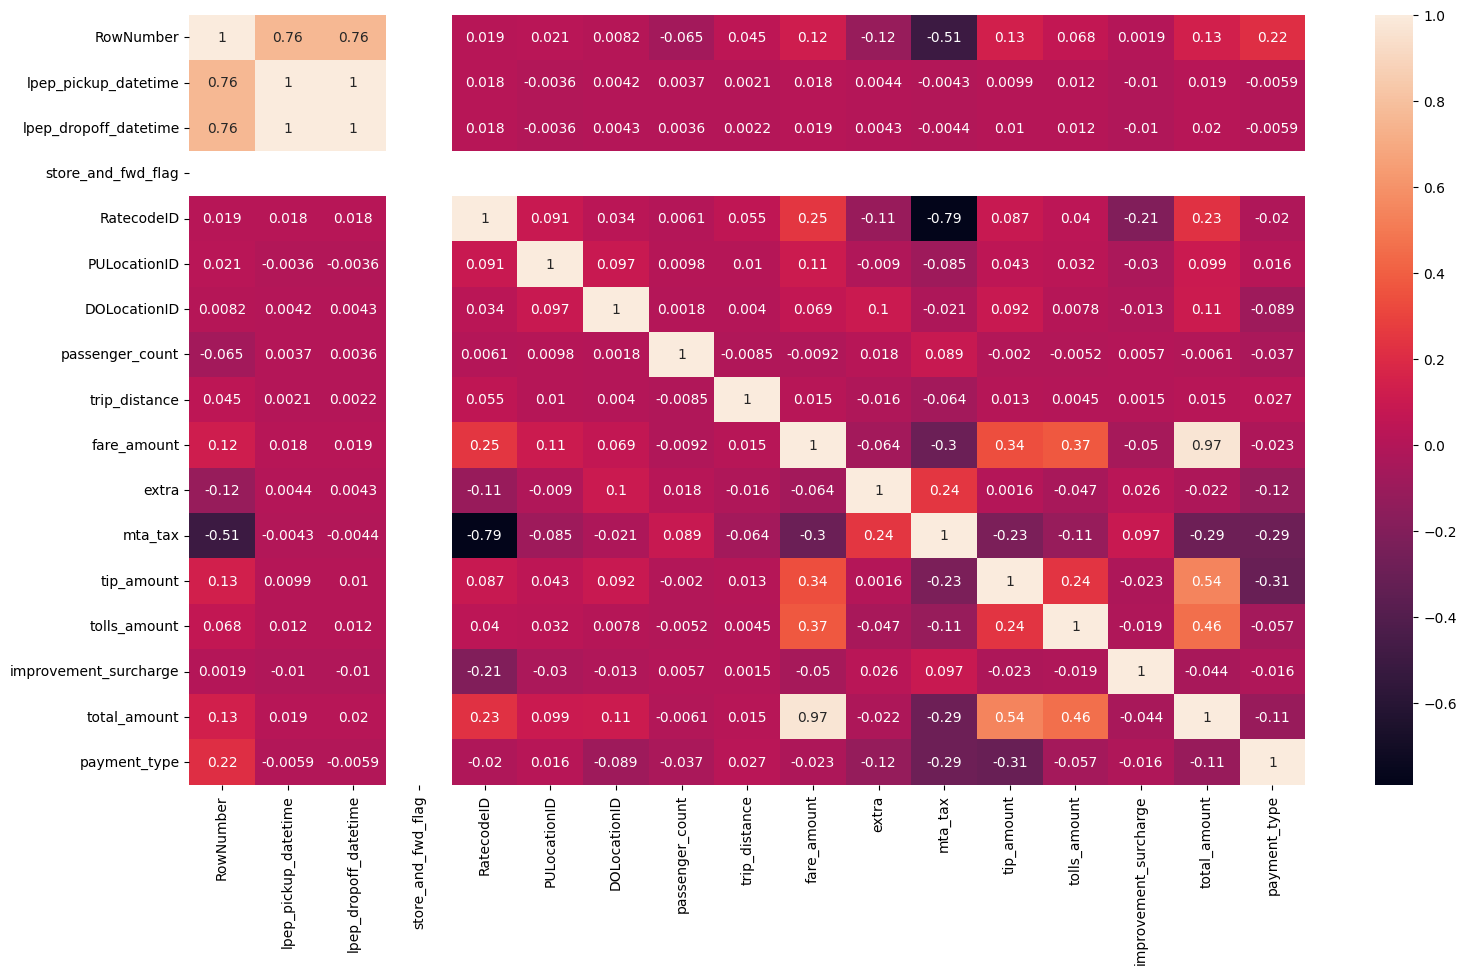

In [114]:
plt.figure(figsize= (18, 10))
sns.heatmap(df.corr(), annot= True);

In [115]:
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()


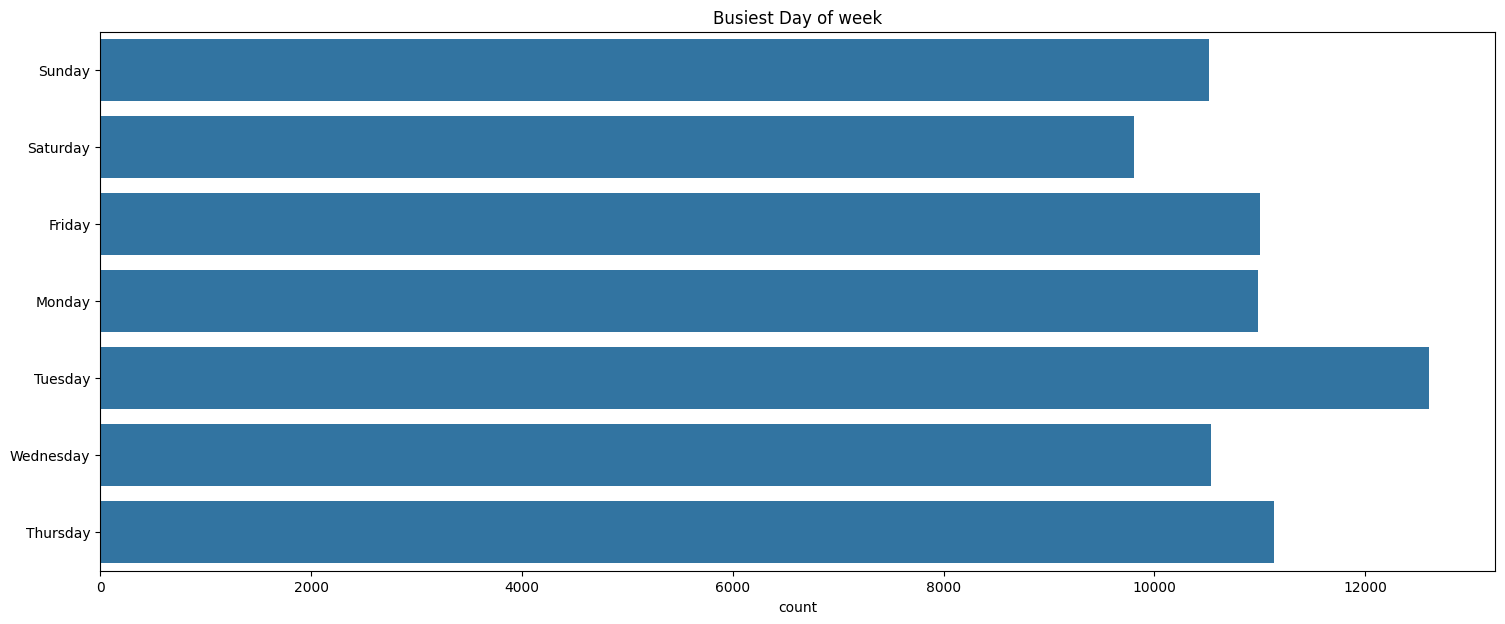

In [145]:
plt.figure(figsize= (18, 7))
sns.countplot(y= 'day_of_week', data= df)
plt.title('Busiest Day of week')
plt.savefig('sBusyDay.png')
plt.ylabel('');

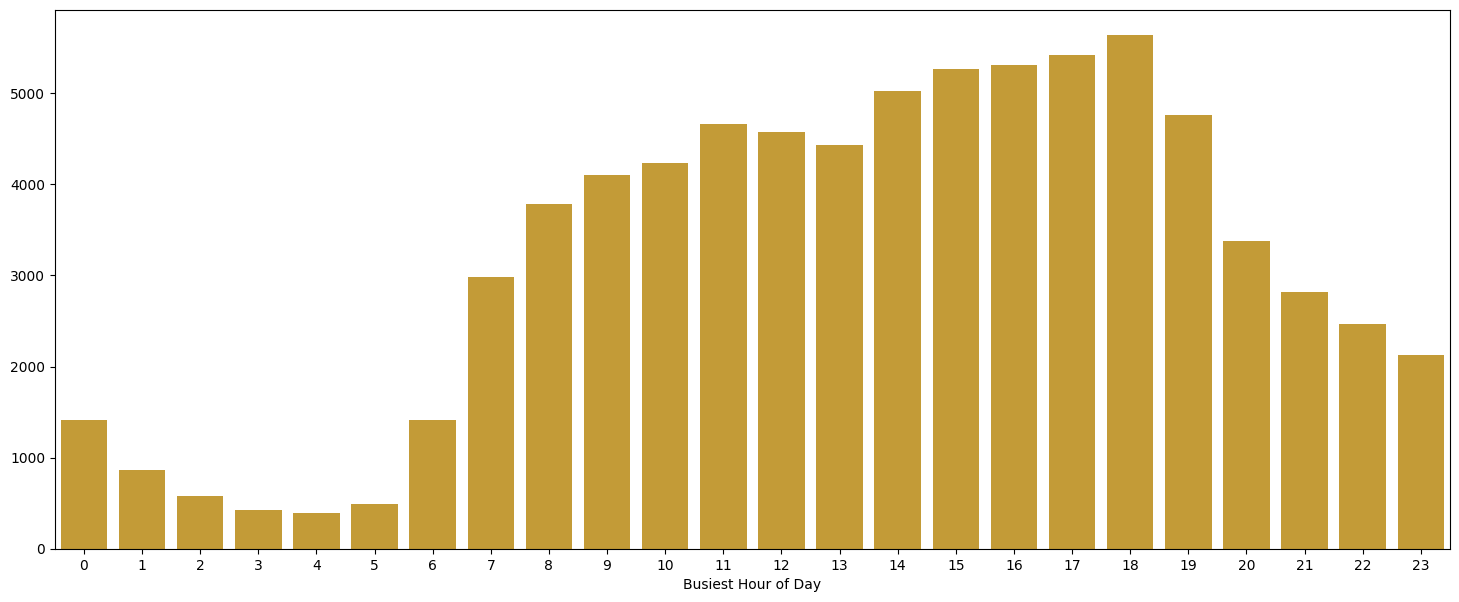

In [167]:
plt.figure(figsize= (18, 7))
sns.countplot(x= df['lpep_pickup_datetime'].dt.hour, data= df, color= 'goldenrod')
plt.ylabel('')
plt.xlabel('Busiest Hour of Day')
plt.savefig('Busiest_Hour_of_Day.png')


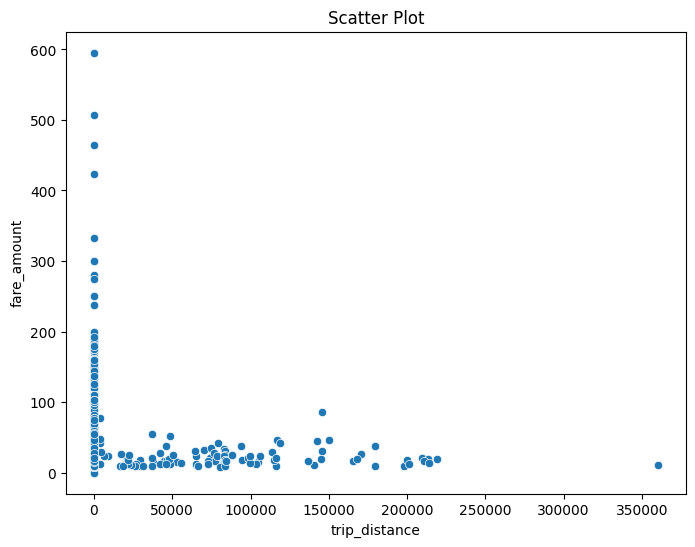

In [166]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.title('Scatter Plot')
plt.savefig('scatter_plot.png')


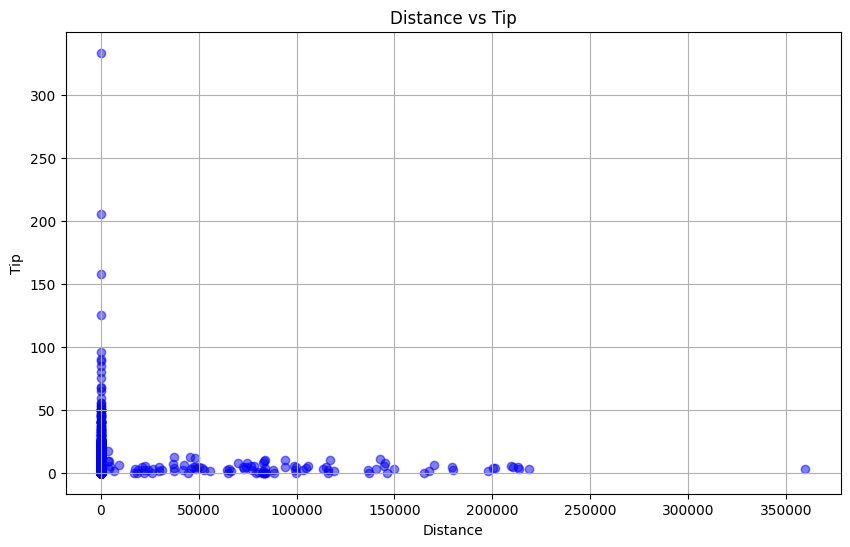

In [165]:
distance = df['trip_distance']
tip = df['tip_amount']
plt.figure(figsize=(10, 6))
plt.scatter(distance, tip, color='blue', alpha=0.5)
plt.title('Distance vs Tip')
plt.xlabel('Distance')
plt.ylabel('Tip')
plt.grid(True)
plt.savefig('DistancevsTip.png')
plt.show()

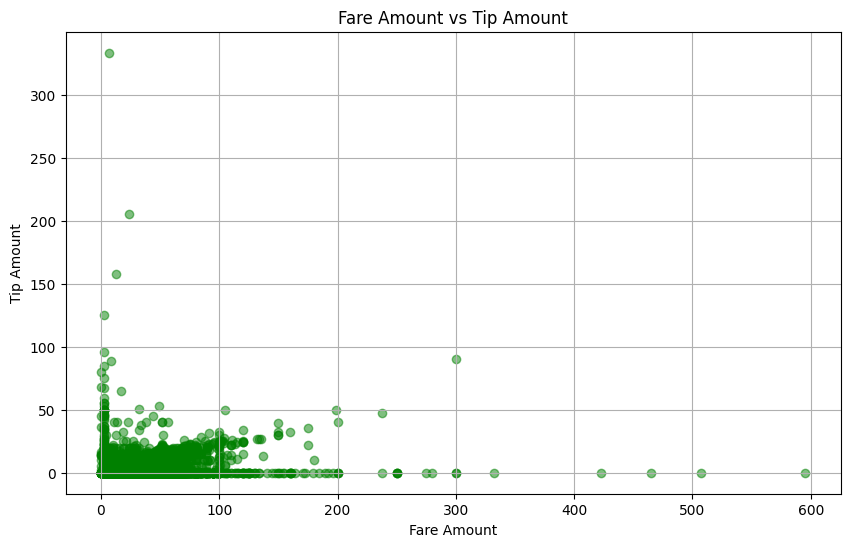

In [168]:
fare_amount = df['fare_amount']
tip = df['tip_amount']
plt.figure(figsize=(10, 6))
plt.scatter(fare_amount, tip, color='green', alpha=0.5)
plt.title('Fare Amount vs Tip Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.savefig('Fare Amount vs Tip Amount.png')
plt.grid(True)
plt.show()

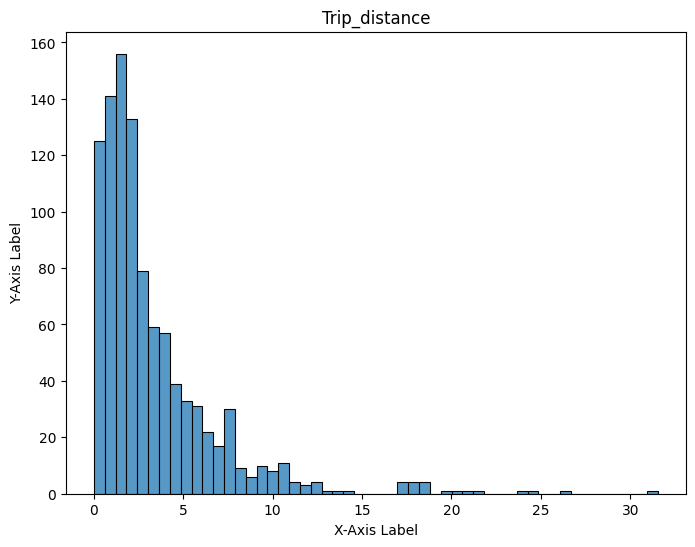

In [170]:
plt.figure(figsize=(8, 6))
sns.histplot(df['trip_distance'][:1000])
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Trip_distance')
plt.savefig('tripdistance.png')
plt.show()
plt.close()

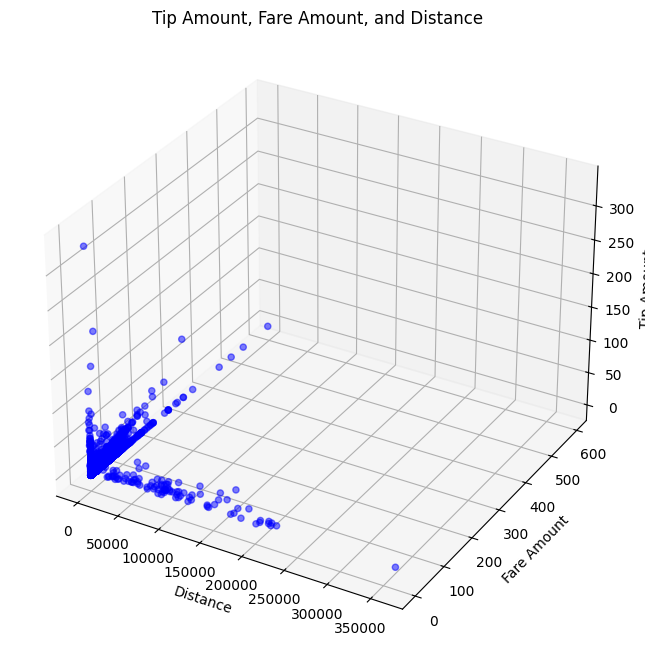

In [172]:
tip = df['tip_amount']
fare_amount = df['fare_amount']
distance = df['trip_distance']

fig = plt.figure(figsize=(10, 8))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(distance, fare_amount, tip, c='blue', marker='o', alpha=0.5)

axis.set_xlabel('Distance')
axis.set_ylabel('Fare Amount')
axis.set_zlabel('Tip Amount')
plt.title('Tip Amount, Fare Amount, and Distance')
plt.savefig('3DTip Amount, Fare Amount, and Distance.png')

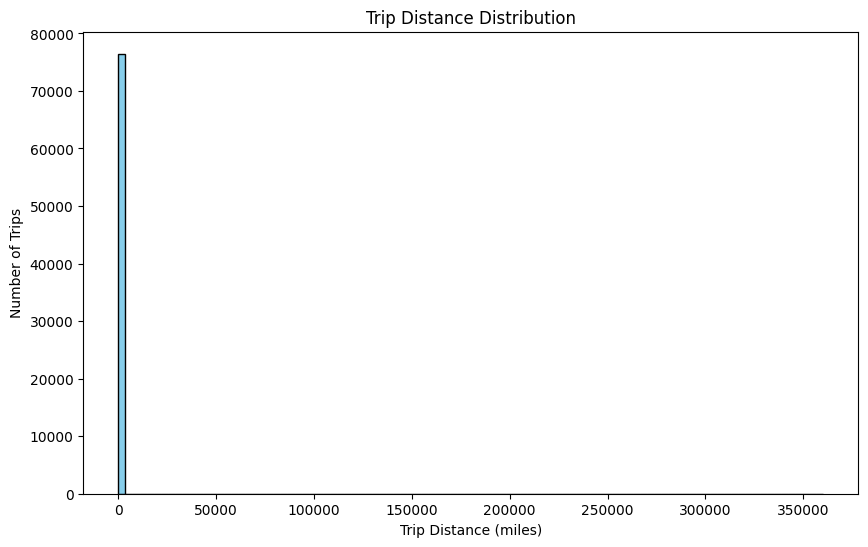

In [133]:
plt.figure(figsize=(10, 6))
plt.hist(df['trip_distance'], bins=100, color='skyblue', edgecolor='black')
plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Number of Trips')
plt.show()

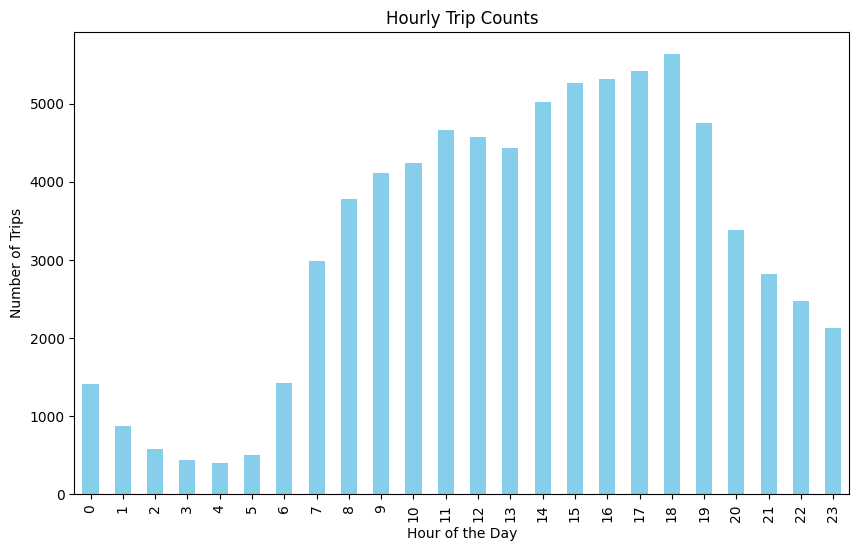

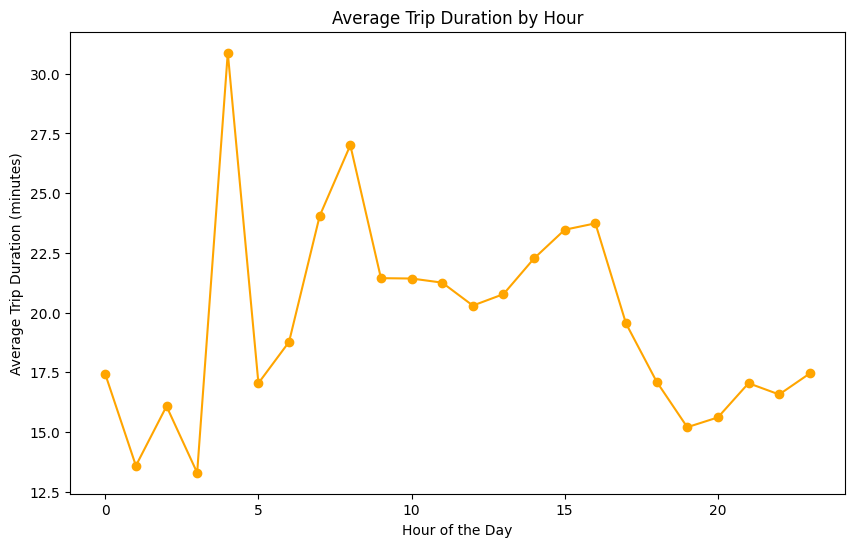

In [173]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes


hourly_counts = df['lpep_pickup_datetime'].dt.hour.value_counts().sort_index()
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Hourly Trip Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.savefig('Hourly_trips_count.png')
plt.show()

# Average time
avg_duration_by_hour = df.groupby(df['lpep_pickup_datetime'].dt.hour)['trip_duration'].mean()
plt.figure(figsize=(10, 6))
avg_duration_by_hour.plot(kind='line', marker='o', color='orange')
plt.title('Average Trip Duration by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.savefig('Average Trip Duration by Hour.png')

plt.show()


In [135]:
count_zeros = (df['fare_amount'] == 0).sum()
print("Number of zeros in the column:", count_zeros)


Number of zeros in the column: 18


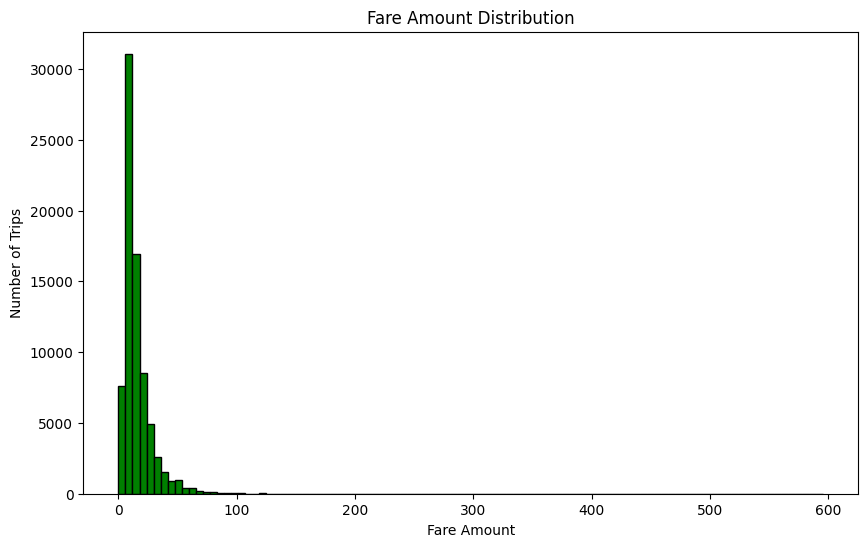

In [157]:
plt.figure(figsize=(10, 6))
plt.hist(df['fare_amount'], bins=100, color='green', edgecolor='black')
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount')
plt.ylabel('Number of Trips')
plt.show()


In [139]:
df['pickup_year'] = df['lpep_pickup_datetime'].dt.year

yearly_highest_trips = df.groupby('pickup_year')['trip_distance'].max()
yearly_lowest_trips = df.groupby('pickup_year')['trip_distance'].min()

print("Yearly Highest Trips:")
print(yearly_highest_trips)
print("\nYearly Lowest Trips:")
print(yearly_lowest_trips)


Yearly Highest Trips:
pickup_year
2022    360068.14
Name: trip_distance, dtype: float64

Yearly Lowest Trips:
pickup_year
2022    0.0
Name: trip_distance, dtype: float64


In [158]:

distinct_location_count = df['PULocationID'].nunique()

print("Number of distinct PULocationID values:", distinct_location_count)


Number of distinct PULocationID values: 240


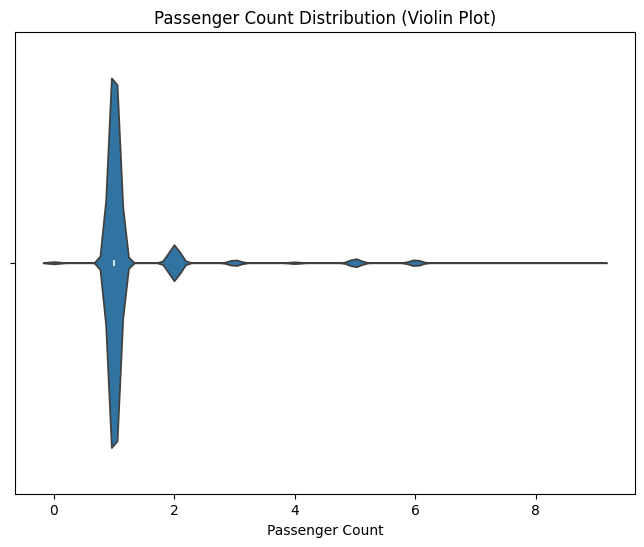

In [195]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['passenger_count'])
plt.xlabel('Passenger Count')
plt.title('Passenger Count Distribution (Violin Plot)')
plt.show()

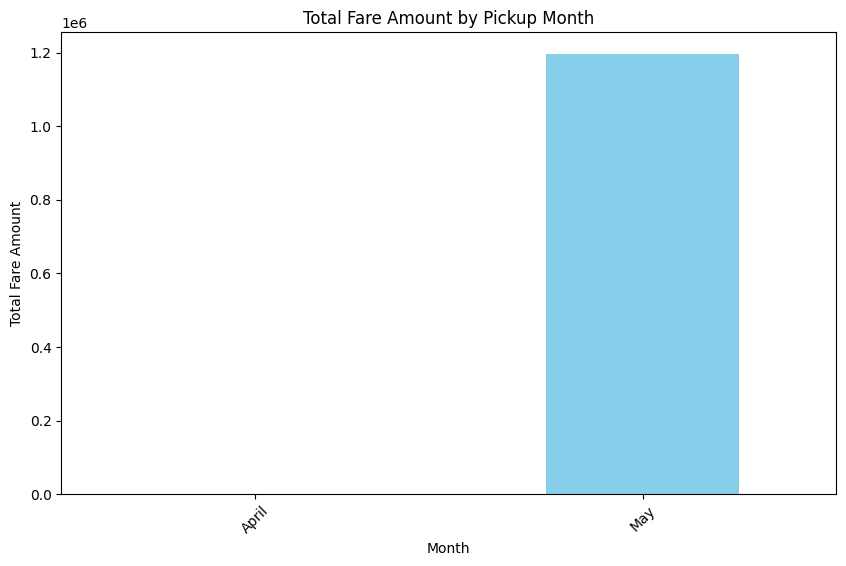

In [197]:


df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

df['pickup_month'] = df['lpep_pickup_datetime'].dt.month_name()

monthly_fare = df.groupby('pickup_month')['fare_amount'].sum()

plt.figure(figsize=(10, 6))
monthly_fare.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Fare Amount')
plt.title('Total Fare Amount by Pickup Month')
plt.xticks(rotation=45)
plt.show()


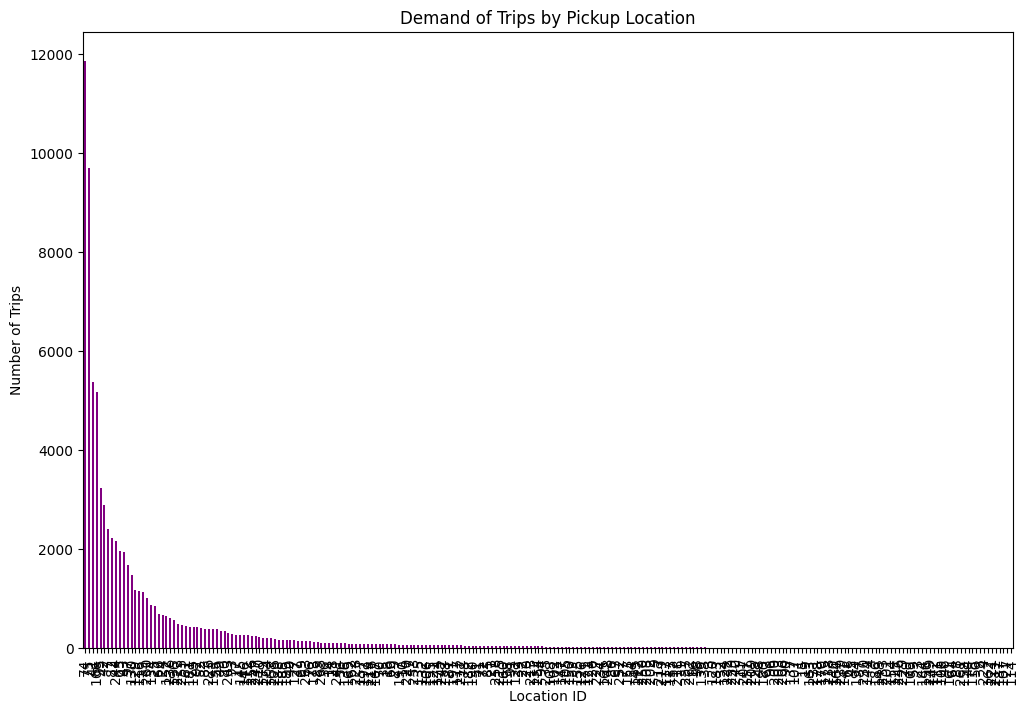

In [160]:
location_counts = df['PULocationID'].value_counts()
plt.figure(figsize=(12, 8))
location_counts.plot(kind='bar', color='purple')
plt.title('Demand of Trips by Pickup Location')
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.show()


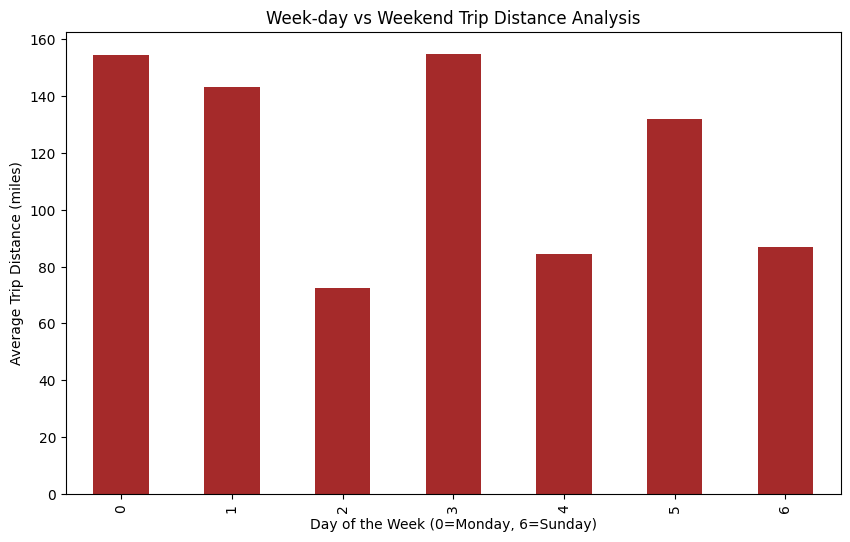

In [174]:
df['pickup_dayofweek'] = df['lpep_pickup_datetime'].dt.dayofweek

weekdays_vs_weekend = df.groupby('pickup_dayofweek')['trip_distance'].mean()
plt.figure(figsize=(10, 6))
weekdays_vs_weekend.plot(kind='bar', color='brown')
plt.title('Week-day vs Weekend Trip Distance Analysis')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Trip Distance (miles)')
plt.savefig('Week-day vs Weekend Trip Distance Analysis.png')
plt.show()


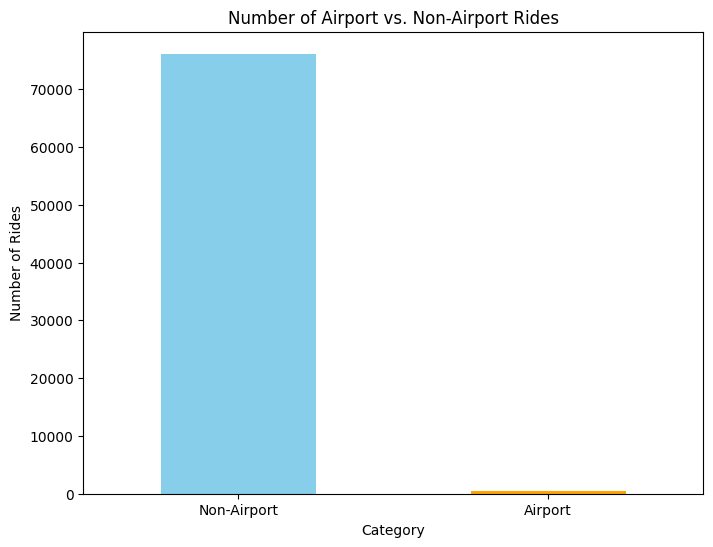

In [175]:

def categorize_ratecode(RatecodeID):
    if RatecodeID in [2, 3, 4]:
        return 'Airport'
    else:
        return 'Non-Airport'

df['Category'] = df['RatecodeID'].apply(categorize_ratecode)
ride_counts = df['Category'].value_counts()
plt.figure(figsize=(8, 6))
ride_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Category')
plt.ylabel('Number of Rides')
plt.title('Number of Airport vs. Non-Airport Rides')
plt.savefig('Airport_vs_nonairport.png')
plt.xticks(rotation=0)
plt.show()


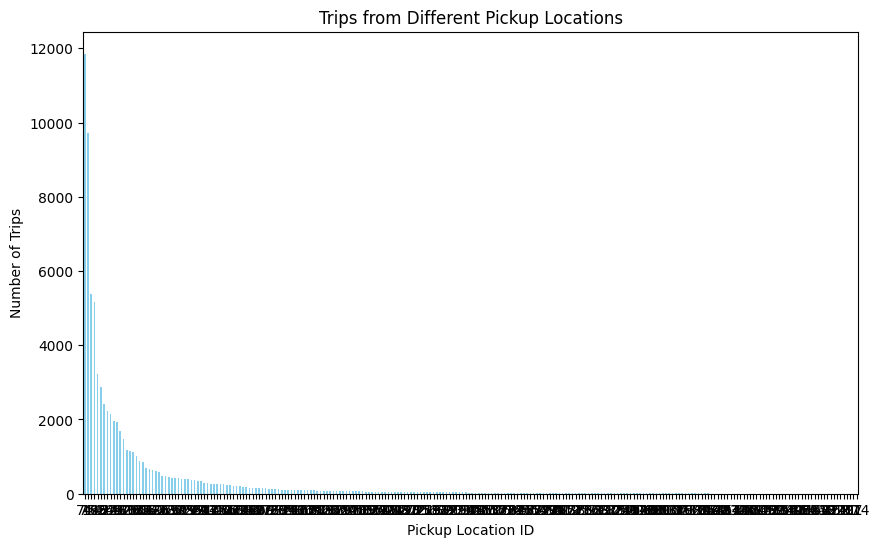

In [177]:
trip_counts = df['PULocationID'].value_counts()
plt.figure(figsize=(10, 6))
trip_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Pickup Location ID')
plt.ylabel('Number of Trips')
plt.title('Trips from Different Pickup Locations')
plt.xticks(rotation=0)
plt.savefig('tripsfromdifferentloactions.png')
plt.show()

In [202]:
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Green Taxi Analysis - 20222', 0, 1, 'C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, 'Page %s' % self.page_no(), 0, 0, 'C')



pdf = PDF()
pdf.add_page()
pdf.set_font('Arial', '', 12)

data = {
    'id': 'unique identifier for each trip',
    'vendor_id': 'code indicating the provider associated with the trip record',
    'pickup_datetime': 'date and time when the meter was engaged',
    'dropoff_datetime': 'date and time when the meter was disengaged',
    'passenger_count': 'number of passengers in the vehicle (driver entered value)',
    'pickup_longitude': 'longitude where the meter was engaged',
    'pickup_latitude': 'latitude where the meter was engaged',
    'dropoff_longitude': 'longitude where the meter was disengaged',
    'dropoff_latitude': 'latitude where the meter was disengaged',
    'store_and_fwd_flag': 'flag indicating whether the trip record was held in vehicle memory before sending to the vendor'
}
for key, value in data.items():
    text = f"{key} - {value}"
    pdf.multi_cell(0, 10, txt=text, align='L')
    pdf.ln(10) 

#url = "https://public.tableau.com/views/greentaxianalysisfinal/greentaxinyc-2022?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link"
text = "Click here to visit TABLEAU dashboard"
pdf.set_text_color(0, 0, 255) 
pdf.set_font('Arial', 'U')
pdf.cell(0, 10, txt=text, link=url, ln=True, align='C')


pdf.cell(0, 10, 'DistancevsTip', 0, 1)
pdf.image('DistancevsTip.png', x = None, y = None, w = 0, h = 150)


pdf.cell(0, 10, 'Fare Amount vs Tip Amount', 0, 1)
pdf.image('Fare Amount vs Tip Amount.png', x = None, y = None, w = 0, h = 150)


pdf.cell(0, 10, 'Histogram Example', 0, 1)
pdf.image('histogram.png', x = None, y = None, w = 0, h = 150)
pdf.ln(10)

pdf.cell(0, 10, 'Scatter Plot Example', 0, 1)
pdf.image('scatter_plot.png', x = None, y = None, w = 0, h = 150)


pdf.cell(0, 10, '3DTip Amount, Fare Amount, and Distance', 0, 1)
pdf.image('3DTip Amount, Fare Amount, and Distance.png', x = None, y = None, w = 0, h = 150)


pdf.cell(0, 10, 'Airport_vs_nonairport', 0, 1)
pdf.image('Airport_vs_nonairport.png', x = None, y = None, w = 0, h = 150)


pdf.cell(0, 10, 'Average Trip Duration by Hour', 0, 1)
pdf.image('Average Trip Duration by Hour.png', x = None, y = None, w = 0, h = 150)


pdf.cell(0, 10, 'Busiest_Hour_of_Day', 0, 1)
pdf.image('Busiest_Hour_of_Day.png', x = None, y = None, w = 0, h = 150)


pdf.cell(0, 10, 'Hourly_trips_count', 0, 1)
pdf.image('Hourly_trips_count.png', x = None, y = None, w = 0, h = 150)


pdf.cell(0, 10, 'Trip Distance', 0, 1)
pdf.image('tripdistance.png', x = None, y = None, w = 0, h = 150)


pdf.cell(0, 10, 'Average Trip Duration by Hour', 0, 1)
pdf.image('Average Trip Duration by Hour.png', x = None, y = None, w = 0, h = 150)


pdf.cell(0, 10, 'Busiest_Hour_of_Day', 0, 1)
pdf.image('Busiest_Hour_of_Day.png', x = None, y = None, w = 0, h = 150)
pdf.output('Green_Taxi_Analysis_report.pdf')




''

In [131]:
df.to_csv('updated_transformed_data.csv', index=False)


In [132]:
df.to_excel('output_excel.xlsx', index=True)  #CONVERTED TO EXCEL
